### Principal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique. It helps in transforming high-dimensional data into a lower-dimensional form while retaining as much of the original variability as possible. 

The basic idea behind PCA is to identify the principal components, which are linear combinations of the original features that capture the maximum variance in the data.

How PCA works:

1. Centering the Data:
    * The first step is to center the data by subtracting the mean of each feature from the corresponding values. This ensures that the new coordinate system (principal components) is centered at the origin.
2. Compute the Covariance Matrix:
    * Calculate the covariance matrix of the centered data. The covariance matrix gives an indication of how features vary together.
3. Eigenvalue Decomposition:
    * Find the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the directions of maximum variance in the data, and eigenvalues indicate the magnitude of variance along each eigenvector.
4. Select Principal Components:
    * Sort the eigenvectors based on their corresponding eigenvalues in descending order. The eigenvectors with the highest eigenvalues (principal components) capture the most variance in the data.
5. Projection:
    * Project the original data onto the selected principal components. This involves computing the dot product of the original data with the selected eigenvectors.

### Projection to Low Dimension
Image credit: ISLR textbook and Zhang et al (2010)
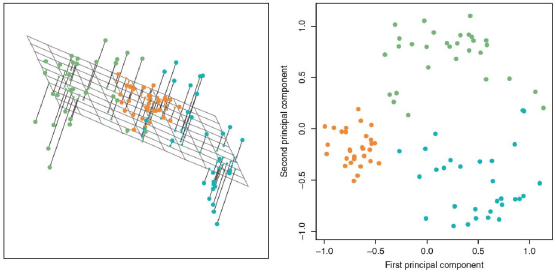

### Normalized Loading Vectors
PCA transformation is a linear combination of original features. The coefficients $\phi_{i, j}$ are called loading vectors and they are normalized, which means that the sum of those squared is going to be one. They work as a weights. That means how important of these features should be in order to define the principal component.

Image credit: Geena Kim, course DTSA 5510

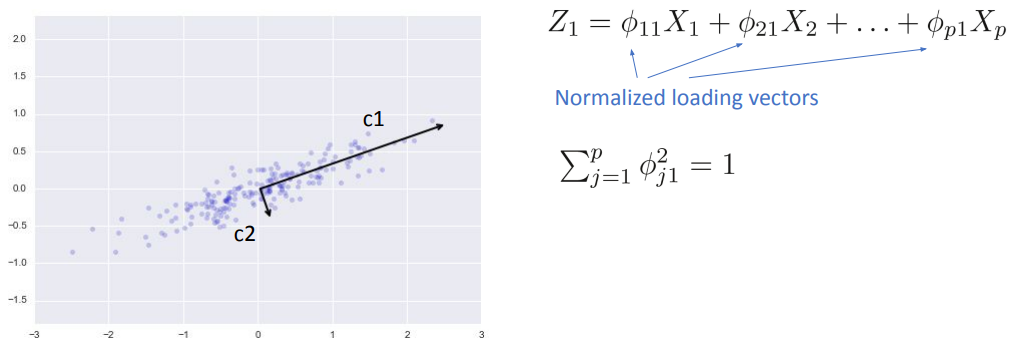

### Visualize Linear Transformation 
Reference: https://www.youtube.com/watch?v=g-Hb26agBFg&list=PLs8w1Cdi-zvZGyT2Rt0ieA0G6xGUqn3Xw&index=3  - PCA - Serano.Academy

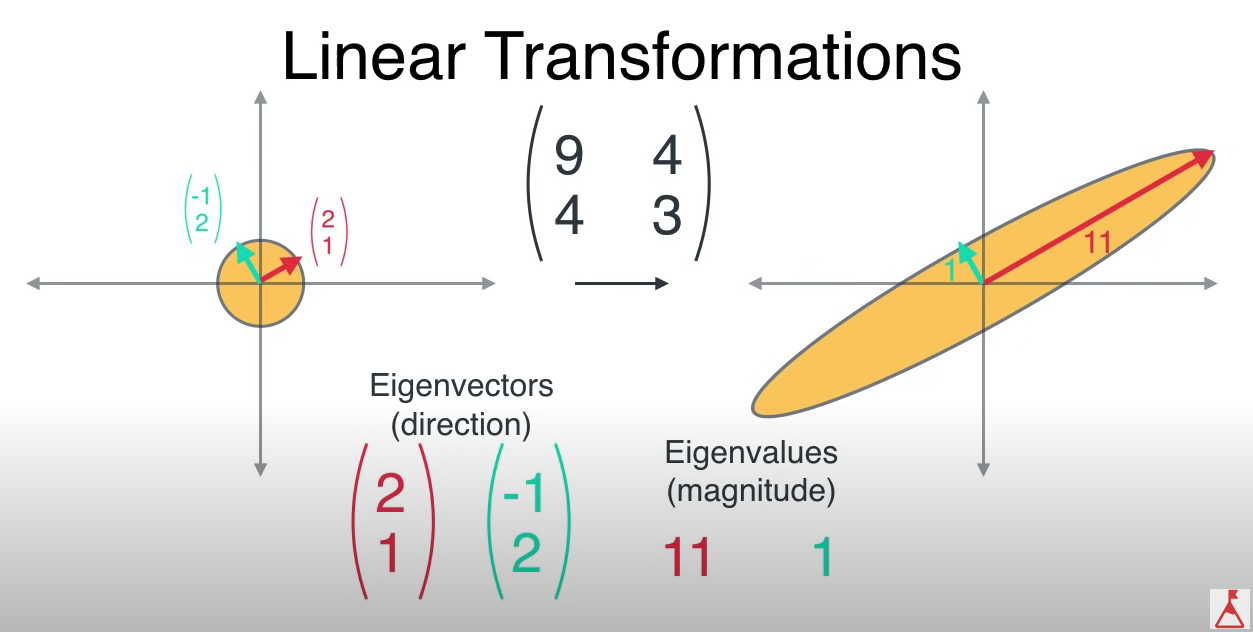

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# the eigenvectors are orthogonal since the covariance matrix is always symmetric
cov_matrix = np.array([[9, 4], [4, 3]])
w, v = np.linalg.eig(cov_matrix)
print('Eigenvalues (magnitude): {}'.format(w))
print('Eigenvectors (direction): {} and {}'.format(np.round(2*v[:, 0], 0), np.round(2*v[:, 1])))

Eigenvalues (magnitude): [11.  1.]
Eigenvectors (direction): [2. 1.] and [-1.  2.]


In [3]:
def plot(A, n=50):
    # create unit circle with 50 points
    x = np.array([[np.cos(2 * np.pi * i / n),
                   np.sin(2 * np.pi * i / n)] for i in range(n)])
    
    y = np.dot(A, x.T).T
    fig, (ax1, ax2) = plt.subplots(figsize=(6, 3), ncols=2)
    ax1.scatter(x[:, 0], x[:, 1])
    ax2.scatter(y[:, 0], y[:, 1])
    
    # draw the direction and magnitude from eigenvectors and eigenvalues
    w, v = np.linalg.eig(A)
    ax2.arrow(0, 0, w[0]*v[0, 0], w[0]*v[1, 0], color='r', width=0.2)
    ax2.arrow(0, 0, w[1]*v[0, 1], w[1]*v[1, 1], color='g', width=0.2)

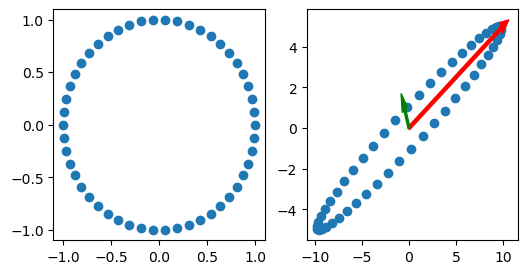

In [4]:
plot(cov_matrix)

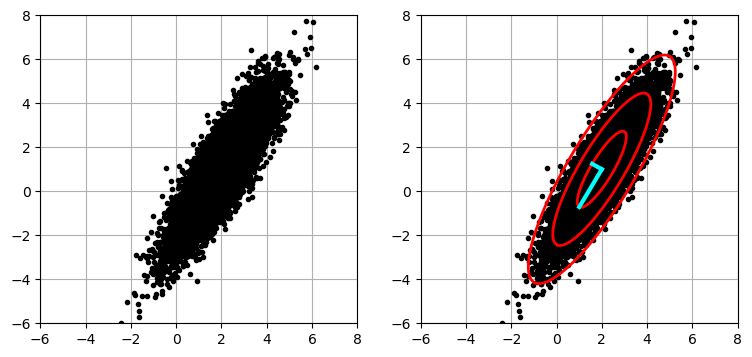

In [13]:
# Code from: https://github.com/dynamicslab/databook_python/blob/master/CH01/CH01_SEC05_1_PCAGaussian.ipynb

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000           # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
ax1.plot(X[0, :], X[1, :], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

Xavg = np.mean(X, axis=1)                 # Compute mean
B = X - np.tile(Xavg, (nPoints, 1)).T     # Mean-subtracted data

# Find principal components (SVD - Singular Value Decomposition)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints), full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')    # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

theta = 2 * np.pi * np.arange(0, 1, 0.01)

# 1-std, 2-std, 3-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0, :], Xavg[1] + Xstd[1, :], '-', color='r', linewidth=2)
ax2.plot(Xavg[0] + 2*Xstd[0, :], Xavg[1] + 2*Xstd[1, :], '-', color='r', linewidth=2)
ax2.plot(Xavg[0] + 3*Xstd[0, :], Xavg[1] + 3*Xstd[1, :], '-', color='r', linewidth=2)
#ax2.plot(Xavg[0], Xavg[1], 'x', color='b')

# Plot principal components U[:, 0]S[0] and U[:, 1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0] + U[0, 0] * S[0]]),
         np.array([Xavg[1], Xavg[1] + U[1, 0] * S[0]]), color='cyan', linewidth=3)
ax2.plot(np.array([Xavg[0], Xavg[0] + U[0, 1] * S[1]]),
         np.array([Xavg[1], Xavg[1] + U[1, 1] * S[1]]), color='cyan', linewidth=3)
plt.show()

In [28]:
# Code from: https://github.com/patrickloeber/MLfromscratch/blob/master/mlfromscratch/pca.py
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
    
    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)    # mean along the rows of X => mean for each column of X
        X = X - self.mean
        
        # Cov function needs samples as columns (rowvar default is True), hence we transposed X
        # or can set rowvar to False => np.cov(X_mean_centered, rowvar=False)
        cov = np.cov(X.T)
        
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        # eigenvector v = [:, i] column vector, transpose for easier calculations
        # then sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]    # sort in descending order
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # store the first n eigenvectors
        self.components = eigenvectors[:self.n_components]
        
        
    def transform(self, X):
        # project the data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [6]:
# Testing
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [56]:
plt.rcParams['figure.figsize'] = (5, 3)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


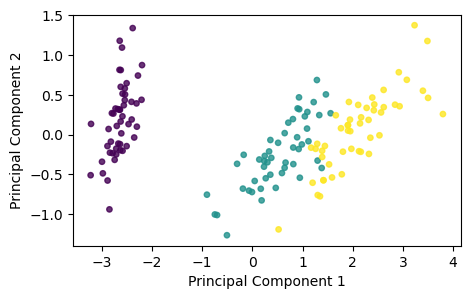

In [64]:
print(Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, alpha=0.8, s=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

SKLearn uses single value decomposition algorithm instead of a simple eigenvalue decomposition. SVD is a more general than eigenvalue decomposition, but two are the same when the matrix is symmetric and have a positive eigenvalues.

In [26]:
# Use Sklearn's PCA
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

X, y = load_iris(return_X_y=True)
X_mean_centered = X - np.mean(X, axis=0)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_mean_centered)

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,PC1,PC2
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,-2.728717,0.326755


In [53]:
# check normalized loading vectors
print(pca.components_)
print('norm(1st loading vectors):', np.sqrt(sum(pca.components_[0]**2)))
print('norm(2nd loading vectors):', np.linalg.norm(pca.components_[1]))

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
norm(1st loading vectors): 1.0
norm(2nd loading vectors): 1.0000000000000004


In [58]:
pca.singular_values_

array([25.09996044,  6.01314738])

In [57]:
np.sqrt(sum(df.PC1**2))

25.09996044218387

In [44]:
np.sqrt(sum(df.PC2**2))

6.013147382308733

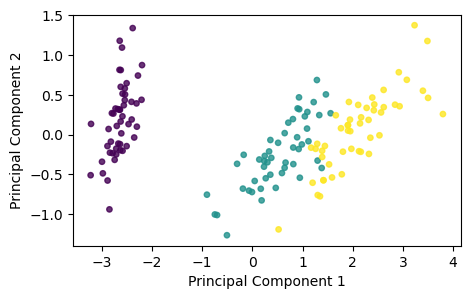

In [59]:
plt.scatter(df.PC1, df.PC2, c=df.species, alpha=0.8, s=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

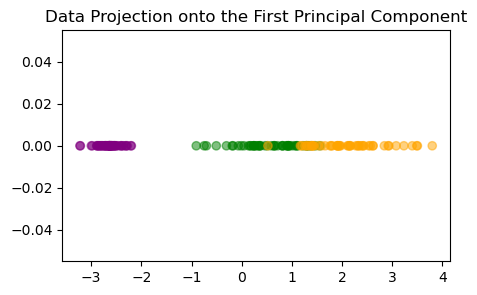

In [60]:
color_map = {0: 'purple', 1: 'green', 2: 'orange'}
colors = [color_map[val] for val in df.species]

plt.scatter(df.PC1, np.zeros_like(df.PC1), color=colors, marker='o', alpha=0.5)
plt.title('Data Projection onto the First Principal Component');

### Compute covariance matrix

In [19]:
np.cov(X_mean_centered.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [20]:
cov_matrix_np = np.cov(X_mean_centered, rowvar=False)
cov_matrix_np

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

Define covariance matrix

$C = \frac{1}{N-1} X^{T} X$

where X has to have zero mean, i.e. we have to normalize all the features first.

In [21]:
cov_matrix_dot = (X_mean_centered.T @ X_mean_centered) / (X_mean_centered.shape[0] - 1)
cov_matrix_dot

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [22]:
# Check if the matrices are close (due to numerical precision)
print(np.allclose(cov_matrix_np, cov_matrix_dot))

True


### Explained Variance

Explained variance is the variance there was captured by that principal component.

In [14]:
# we're still using the Iris dataset
pca = PCA()
principal_components = pca.fit_transform(X_mean_centered)

In [15]:
principal_components.shape

(150, 4)

In [16]:
# Eigenvalues (explained variances) of the principal components
eigenvalues = pca.explained_variance_
eigenvalues

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

### Explained Variance Ratio

In [17]:
eigenvalues = pca.explained_variance_
eigenvalues / sum(eigenvalues)    # explained variance ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [40]:
evr = pca.explained_variance_ratio_
print('Explained Variance Ratio: ', evr)

Explained Variance Ratio:  [0.92461872 0.05306648 0.01710261 0.00521218]


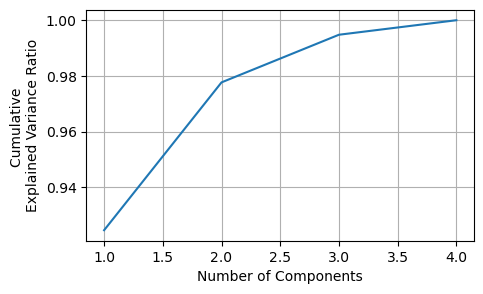

In [44]:
# Cumulative Explained Variance Ratio
cumulative_evr = [sum(evr[:i+1]) for i in range(len(evr))]

plt.plot(np.arange(1, 5), cumulative_evr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative \nExplained Variance Ratio')
plt.grid();

In [23]:
# Eigenvalues (explained variances) of the principal components
eigenvalues = pca.explained_variance_
eigenvalues

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [3]:
# Cov function needs samples as columns (rowvar default is True), hence we transposed X
# or can set rowvar to False => np.cov(X_mean_centered, rowvar=False)
X_mean_centered = X - np.mean(X, axis=0)
cov = np.cov(X_mean_centered.T)

eigenvalues_, eigenvectors_ = np.linalg.eig(cov)
eigenvalues_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

$ C V = V D$ , where
* C = Covariance matrix
* V = Eigenvectors
* D = np.diag(Eigenvalues)

In [4]:
# C V
cov @ eigenvectors_

array([[ 1.52802986, -0.15933489, -0.04552026,  0.00751967],
       [-0.35738162, -0.17718882,  0.04676231, -0.00762063],
       [ 3.62221038,  0.04207247,  0.00596239, -0.01143701],
       [ 1.51493333,  0.01831704,  0.0426892 ,  0.01796349]])

In [10]:
# V D
eigenvectors_ @ np.diag(eigenvalues_)

array([[ 1.52802986, -0.15933489, -0.04552026,  0.00751967],
       [-0.35738162, -0.17718882,  0.04676231, -0.00762063],
       [ 3.62221038,  0.04207247,  0.00596239, -0.01143701],
       [ 1.51493333,  0.01831704,  0.0426892 ,  0.01796349]])

In [6]:
eigenvectors = pca.components_
eigenvectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [8]:
eigenvectors_  # 1st column == 1st row from pca.components_

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [58]:
from scipy.linalg import svd

U, S, VT = svd(X_mean_centered)

In [59]:
VT  

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [ 0.58202985, -0.59791083, -0.07623608, -0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [60]:
S

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [61]:
pca.singular_values_

array([25.09996044,  6.01314738])

### Singular Values
The singular values are the square roots of the eigenvalues of the covariance matrix of the standardized data. 

$ Explained Variance Ratio = \frac{singular values^{2}}{Total Variance}$ 

where the Total Variance is the sum of the squared singular values

In [18]:
# Recall:
eigenvalues = pca.explained_variance_
eigenvalues / sum(eigenvalues)    # explained variance ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [21]:
total_var = sum(pca.singular_values_**2)
pca.singular_values_**2 / total_var

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

### PCA with Ames Housing Data

In [25]:
ames = pd.read_csv('ames_housing_cleaned_encoded.scv')

In [6]:
ames.shape

(2925, 229)

In [9]:
ames.head(2)

,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Electrical.1,Kitchen Qual.1,Functional.1,Fireplace Qu.1,Garage Finish.1,Garage Qual.1,Garage Cond.1,Paved Drive.1,Fence.1,SalePrice
0,3.858807,7.353462,24.898884,3,3,2.259674,2.055642,14.119786,14.119786,6.881187,...,5,3,8,4,3,3,3,2,0,12.278393
1,3.858807,6.221214,20.479373,4,3,2.055642,2.259674,14.121376,14.121376,0.000000,...,5,3,8,0,1,3,3,3,3,11.561716


In [26]:
y = ames['SalePrice'].values
X = ames.drop('SalePrice', axis=1).values

In [45]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import RobustScaler
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [46]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Let's choose 10 principal components
pca = PCA(n_components=10, random_state=42)

In [59]:
Z_train = pca.fit_transform(X_train_scaled)
Z_test = pca.transform(X_test_scaled)

In [49]:
X_train_scaled.shape

(2193, 228)

In [50]:
Z_train.shape

(2193, 10)

### Verify that our principal components are not correlated with one another

In [23]:
import seaborn as sns

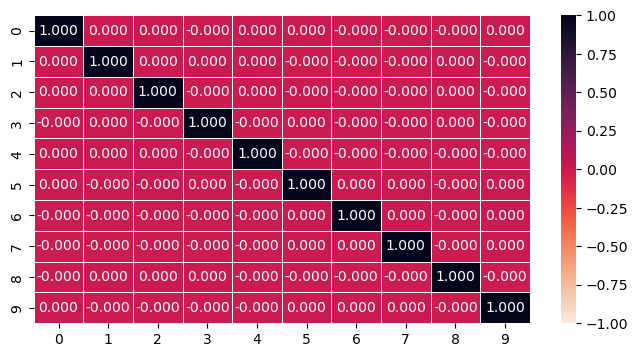

In [35]:
# verify that our principal components are not correlated with one another
plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(Z_train).corr(), annot=True, vmin=-1, vmax=1, cmap='rocket_r',
           fmt='.3f', linewidths=0.5, linecolor='white');

### Linear Regression with PCA

In [60]:
# Linear regression using our original scaled data
regressor = LinearRegression().fit(X_train_scaled, y_train)

In [61]:
print('Train R2:', regressor.score(X_train_scaled, y_train))
print('Test R2:', regressor.score(X_test_scaled, y_test))

Train R2: 0.9441616980802575
Test R2: -8.197977008738317e+18


In [62]:
# Linear regression using PCA
pca = PCA(n_components=10)
pca.fit(X_train_scaled)
Z_train = pca.transform(X_train_scaled)
Z_test = pca.transform(X_test_scaled)

regressor = LinearRegression().fit(Z_train, y_train)
print('Train PCA R2:', regressor.score(Z_train, y_train))
print('Test PCA R2:', regressor.score(Z_test, y_test))

Train PCA R2: 0.8579992569938658
Test PCA R2: 0.8317839606559775


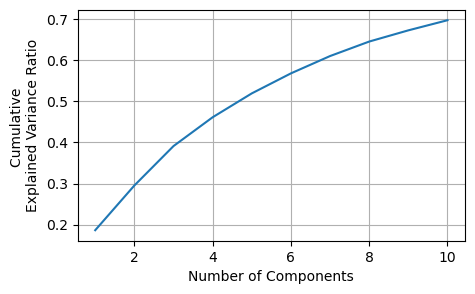

In [57]:
evr = pca.explained_variance_ratio_
cumulative_evr = [sum(evr[:i+1]) for i in range(len(evr))]

plt.plot(np.arange(1, 11), cumulative_evr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative \nExplained Variance Ratio')
plt.grid();

### Fashion MNIST dataset
https://www.openml.org/search?type=data&status=active&id=40996

This dataset will be used for programming assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [2]:
fashion_mnist = fetch_openml(data_id=40996, parser='auto')

In [10]:
fashion_mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
print(fashion_mnist.DESCR)

**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
X = fashion_mnist['data'] 
y = fashion_mnist['target']

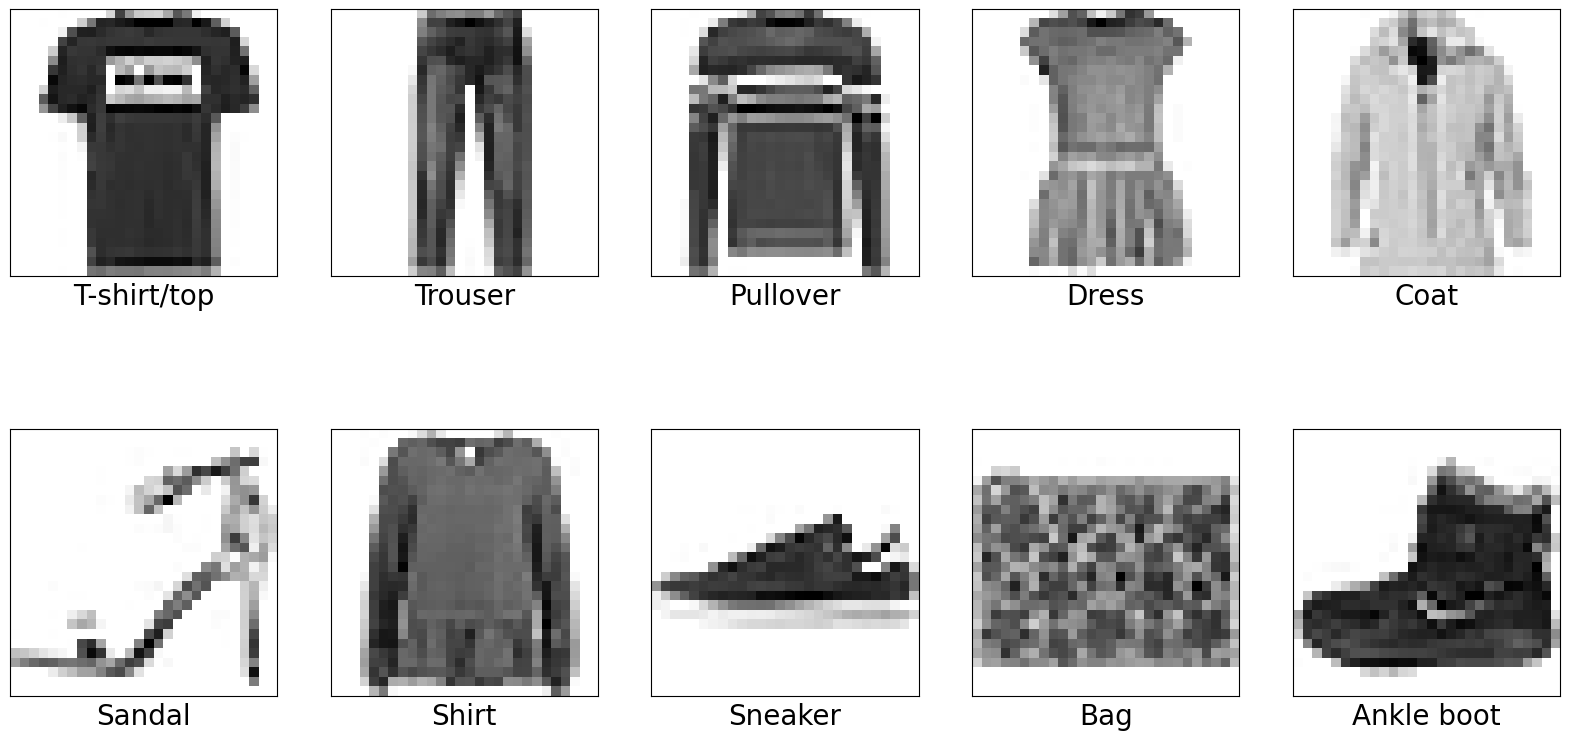

In [26]:
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = X[int(y) == i].iloc[0].to_numpy().reshape(28, 28)
    plt.imshow(img, cmap='binary')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[i], fontsize=20)

### Randomized SVD
Randomized Singular Value Decomposition (SVD) is a technique that approximates the singular value decomposition of a matrix using randomization to speed up the computation while maintaining a reasonable level of accuracy.

The basic idea behind randomized SVD involves multiplying the original matrix A by a randomly generated matrix R to obtain a smaller matrix Y such that $Y = A R$. The SVD of Y is then computed to obtain an approximate singular value decomposition of A. The accuracy of the approximation can be controlled by adjusting the number of random samples or iterations used in the process.

In [2]:
from matplotlib.image import imread

In [4]:
jupyter = imread('jupiter.jpg')

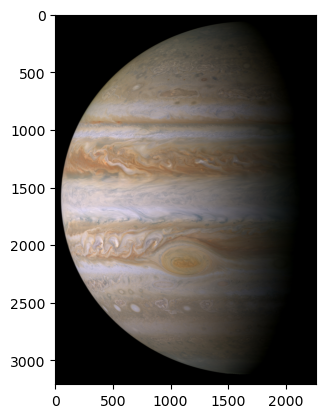

In [6]:
plt.imshow(jupyter);

In [8]:
jupyter.shape

(3207, 2260, 3)

In [19]:
# Convert RGB to grayscale
X = np.mean(jupyter, axis=2)
X.shape

(3207, 2260)

In [23]:
# Code from: https://github.com/dynamicslab/databook_python/blob/master/CH01/CH01_SEC08_RSVD.ipynb
# Define randomized SVD function
def rSVD(X, r, q, p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny, r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z, mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y, full_matrices=0)
    U = Q @ UY

    return U, S, VT

In [24]:
# Deterministic SVD
U, S, VT = np.linalg.svd(X, full_matrices=0)

In [25]:
r = 400    # Target Rank
q = 1      # Power Iterations
p = 4      # Oversampling Parameter

rU, rS, rVT = rSVD(X, r, q, p)

In [26]:
## Reconstruction
XSVD = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:]         # SVD approximation
errSVD = np.linalg.norm(X-XSVD, ord=2) / np.linalg.norm(X, ord=2)

XrSVD = rU[:,:(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1),:]     # SVD approximation
errSVD = np.linalg.norm(X-XrSVD, ord=2) / np.linalg.norm(X, ord=2)

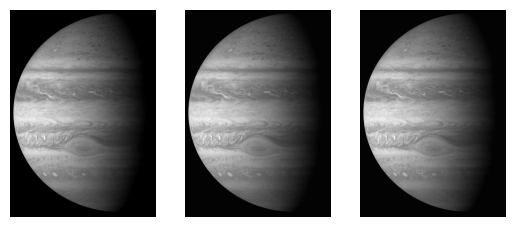

In [27]:
fig, axs = plt.subplots(1, 3)

plt.set_cmap('gray')
axs[0].imshow(X)
axs[0].axis('off')
axs[1].imshow(XSVD)
axs[1].axis('off')
axs[2].imshow(XrSVD)
axs[2].axis('off')

plt.show()

### Eigenfaces
Credit: https://github.com/dynamicslab/databook_python/blob/master/CH01/CH01_SEC06_1.ipynb

Eigenfaces are the principal components obtained through PCA, and they represent the most significant features in a set of images. This technique is primarily used in face recognition, but it can also be applied to image compression.

The compression arises from the fact that only a subset of the eigenvectors (eigenfaces) is used to represent each image, reducing the dimensionality of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

In [2]:
mat = scipy.io.loadmat('allfaces.mat')

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'faces', 'n', 'm', 'sub', 'nfaces', 'person'])

In [4]:
faces = mat['faces']    # One column for each face
n = int(mat['n'])
m = int(mat['m'])
print('Image size: (n x m) = ({} x {})'.format(n, m))
nfaces = np.ndarray.flatten(mat['nfaces'])
print('There are {} people in the dataset'.format(int(mat['person'])))
print('Number of images per each person:\n', nfaces, '=> len(array) =', len(nfaces))

Image size: (n x m) = (192 x 168)
There are 38 people in the dataset
Number of images per each person:
 [64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64] => len(array) = 38


In [5]:
faces.shape

(32256, 2410)

In [6]:
192 * 168

32256

In [7]:
len(faces[:, 0])

32256

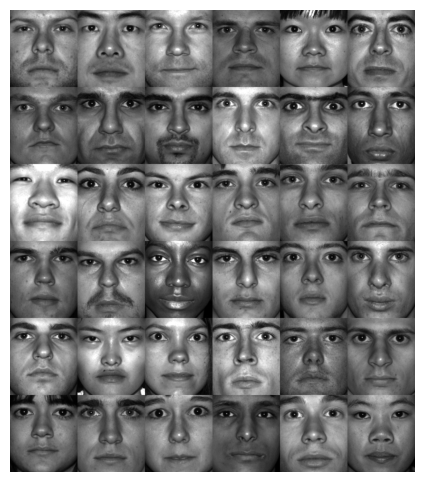

In [8]:
# 6x6 = 36, retain the last 2 person-image for testing
allPersons = np.zeros((n*6, m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n:(j+1)*n, k*m:(k+1)*m] = np.reshape(faces[:, np.sum(nfaces[:count])], (m, n)).T
        count += 1

plt.figure(figsize=(6, 6))
plt.imshow(allPersons, cmap='gray')
plt.axis('off');

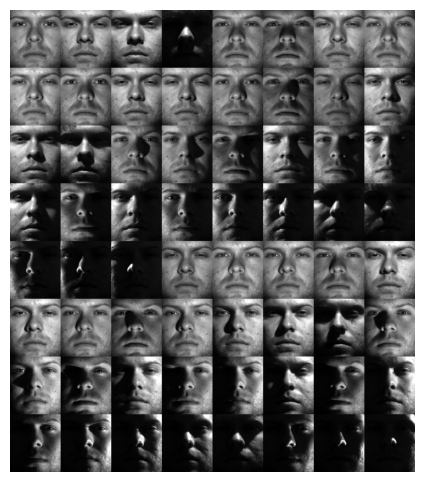

In [10]:
# 64 different shots/images for person 1
subset_person1 = faces[:, :64]
person1_faces = np.zeros((n*8, m*8))
count = 0

for j in range(8):
    for k in range(8):
        if count < nfaces[0]:
            person1_faces[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset_person1[:,count],(m,n)).T
            count += 1

plt.figure(figsize=(6, 6))
plt.imshow(person1_faces, cmap='gray')
plt.axis('off');

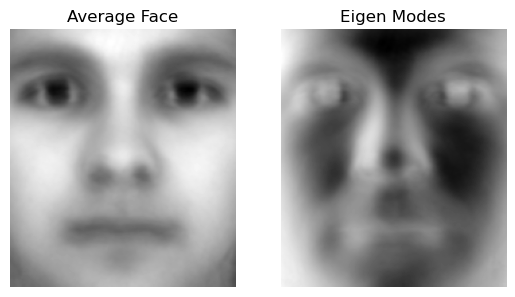

In [6]:
# Use the first 36 people for training data
training_faces = faces[:, :np.sum(nfaces[:36])]
avg_face = np.mean(training_faces, axis=1)    # axis=1 => mean along the columns

# Compute eigenfaces on mean-subtracted training data
X = training_faces - np.tile(avg_face, (training_faces.shape[1], 1)).T

# full_matrices=0 => get the economy SVD, 
# we just need the part that corresponds to non-zero singular values
U, S, VT = np.linalg.svd(X, full_matrices=0)

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(avg_face, (m, n)).T, cmap='gray')
plt.axis('off')
plt.title('Average Face')

# Column vector of U has the same size as the column vector of X, it can also be reshaped
# into eigenfaces (orthonormal basis faces), and so we will plot this
plt.subplot(1, 2, 2)
plt.imshow(np.reshape(U[:, 0], (m, n)).T, cmap='gray')
plt.axis('off')
plt.title('Eigen Modes');

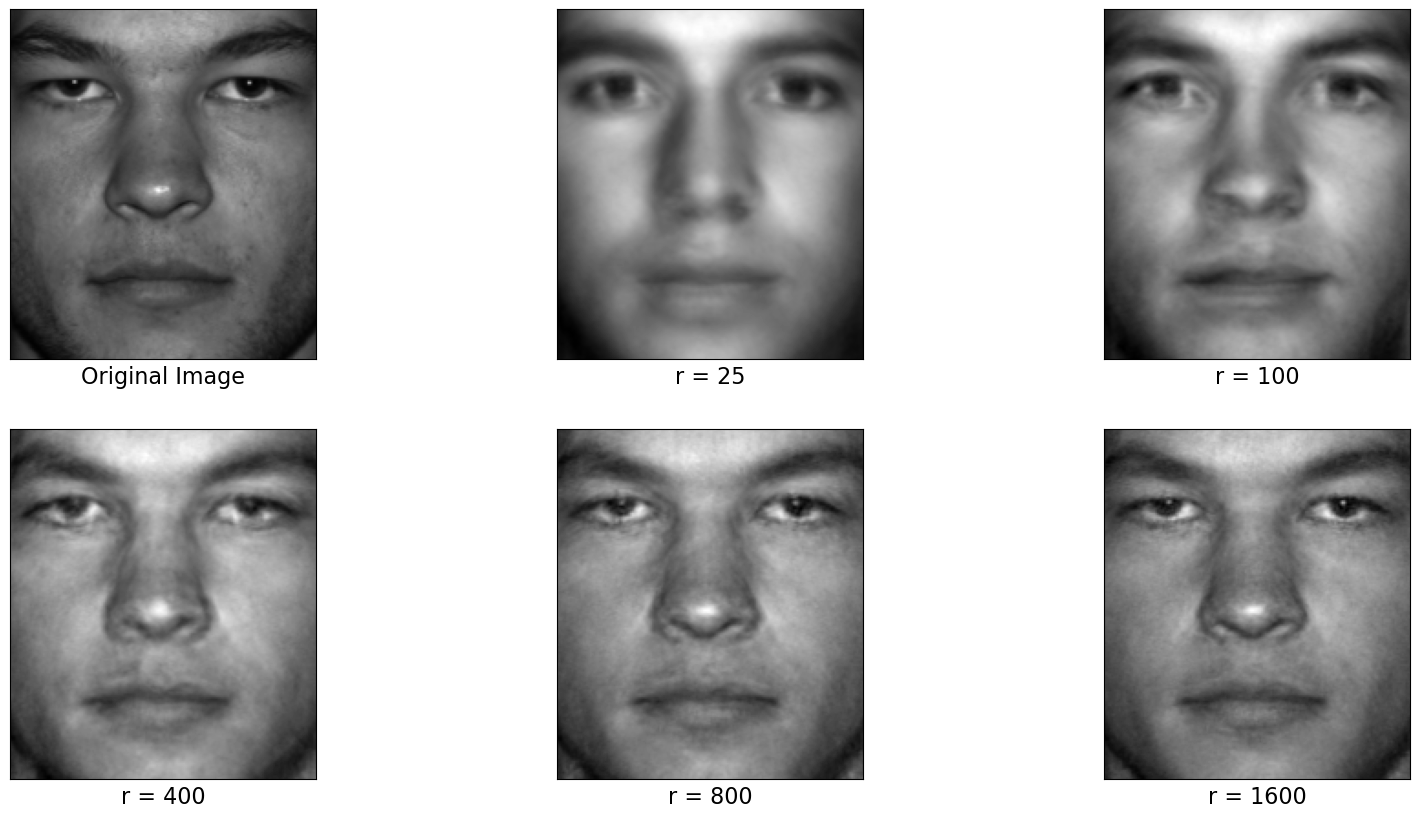

In [27]:
# Eigenface reconstruction of an image from the test set
# We will project the image down into a subspace and then reconstruct with those modes
plt.figure(figsize=(20, 10))
test_face = faces[:, np.sum(nfaces[:36])]    # First shot/image of person 37
plt.subplot(2, 3, 1)
plt.imshow(np.reshape(test_face, (m, n)).T, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('Original Image', fontsize=16)

test_face_MS = test_face - avg_face
r_list = [25, 100, 400, 800, 1600]

i = 1
for r in r_list:
    recon_face = avg_face + U[:, :r] @ U[:, :r].T @ test_face_MS
    plt.subplot(2, 3, i+1)
    plt.imshow(np.reshape(recon_face, (m, n)).T, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('r = {}'.format(str(r)), fontsize=16)
    i += 1